## OptimESM Work Package 5: RAPID 26.5N AMOC Figures

### Description:

Notebook containing plots of AMOC diagnostics for OptimESM idealised experiments.

### Created By:

Ollie Tooth (oliver.tooth@noc.ac.uk)

In [1]:
# -- Import dependencies -- #
import glob
import cftime
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

### **UKESM1-2-LL:** RAPID 26.5N

In [2]:
# -- Define filepaths -- #
ukesm1_dir = "/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP4/data/MOHC"
ukesm1_names = "UKESM1-2-LL_*_natl_meridional_transports_at_26N_endpoint.nc"

ukesm1_paths = glob.glob(f"{ukesm1_dir}/{ukesm1_names}")
ukesm1_paths = sorted([path for path in ukesm1_paths if 'esm-hist' not in path])
ukesm1_paths


['/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP4/data/MOHC/UKESM1-2-LL_esm-up2p0-gwl2p0_r1i1p1f1_1944-01-2444-12_natl_meridional_transports_at_26N_endpoint.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP4/data/MOHC/UKESM1-2-LL_esm-up2p0-gwl3p0_r1i1p1f1_1992-01-2411-12_natl_meridional_transports_at_26N_endpoint.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP4/data/MOHC/UKESM1-2-LL_esm-up2p0-gwl4p0_r1i1p1f1_2044-01-2544-12_natl_meridional_transports_at_26N_endpoint.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP4/data/MOHC/UKESM1-2-LL_esm-up2p0_r1i1p1f1_1850-01-2139-12_natl_meridional_transports_at_26N_endpoint.nc']

In [3]:
# -- Pre-Processing -- #
# Open esm-up2p0 with original time-axis:
time_coder = xr.coders.CFDatetimeCoder(time_unit="s")
ds_up2p0 = xr.open_dataset(ukesm1_paths[3], decode_times=time_coder)
ds_up2p0_gwl2p0 = xr.open_dataset(ukesm1_paths[0], decode_times=time_coder)
ds_up2p0_gwl3p0 = xr.open_dataset(ukesm1_paths[1], decode_times=time_coder)
ds_up2p0_gwl4p0 = xr.open_dataset(ukesm1_paths[2], decode_times=time_coder)


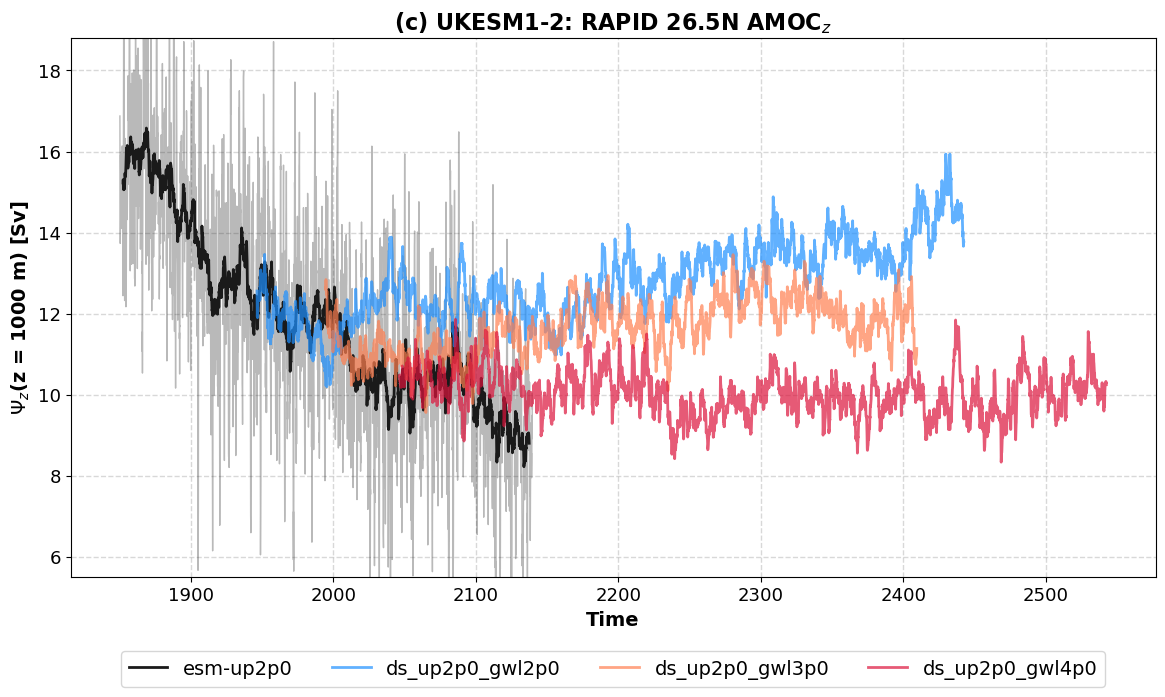

In [4]:
# -- Figure -- #
plt.figure(figsize=(14, 7))
plt.grid(True, linewidth=1, linestyle='--', color='0.5', alpha=0.3)

# Plot esm-up2p0:
ds_up2p0['moc_rapid'].rolling(time=6, center=True).mean().plot(lw=1, color='0.1', alpha=0.3)
ds_up2p0['moc_rapid'].rolling(time=60, center=True).mean().plot(lw=2, color='0.1', label='esm-up2p0')

# ds_up2p0_gwl2p0['moc_rapid'].plot(lw=1, color='dodgerblue', alpha=0.3)
ds_up2p0_gwl2p0['moc_rapid'].rolling(time=60, center=True).mean().plot(lw=2, color='dodgerblue', alpha=0.7, label='ds_up2p0_gwl2p0')

# ds_up2p0_gwl3p0['moc_model'].plot(lw=1, color='coral', alpha=0.3)
ds_up2p0_gwl3p0['moc_rapid'].rolling(time=60, center=True).mean().plot(lw=2, color='coral', alpha=0.7, label='ds_up2p0_gwl3p0')

# ds_up2p0_gwl4p0['moc_model'].plot(lw=1, color='crimson', alpha=0.3)
ds_up2p0_gwl4p0['moc_rapid'].rolling(time=60, center=True).mean().plot(lw=2, color='crimson', alpha=0.7, label='ds_up2p0_gwl4p0')

# Configure Axes:
plt.title("(c) UKESM1-2: RAPID 26.5N AMOC$_{z}$", fontdict={'size': 16, 'weight': 'bold'})
plt.xticks([cftime.Datetime360Day(yr, 1, 1) for yr in np.arange(1900, 2600, 100)], labels=np.arange(1900, 2600, 100).astype('str'), fontsize=13)
plt.xlabel("Time", fontdict={'size': 14, 'weight': 'bold'})
plt.yticks(fontsize=13)
plt.ylim([5.5, 18.8])
plt.ylabel("$\\Psi_{z}$(z = 1000 m) [Sv]", fontdict={'size': 14, 'weight': 'bold'})
plt.legend(ncols=4, fontsize=14, loc="upper center", bbox_to_anchor=(0.5, -0.12))

# Save Figure:
plt.savefig("/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/figures/fig_UKESM1-2_RAPID_AMOCz_esm-up2p0-gwl.png", bbox_inches='tight', dpi=600)


In [13]:
ds_up2p0_gwl4p0['moc_rapid'][-600:].mean()

<xarray.DataArray 'moc_rapid' ()> Size: 8B
array(11.6569596)

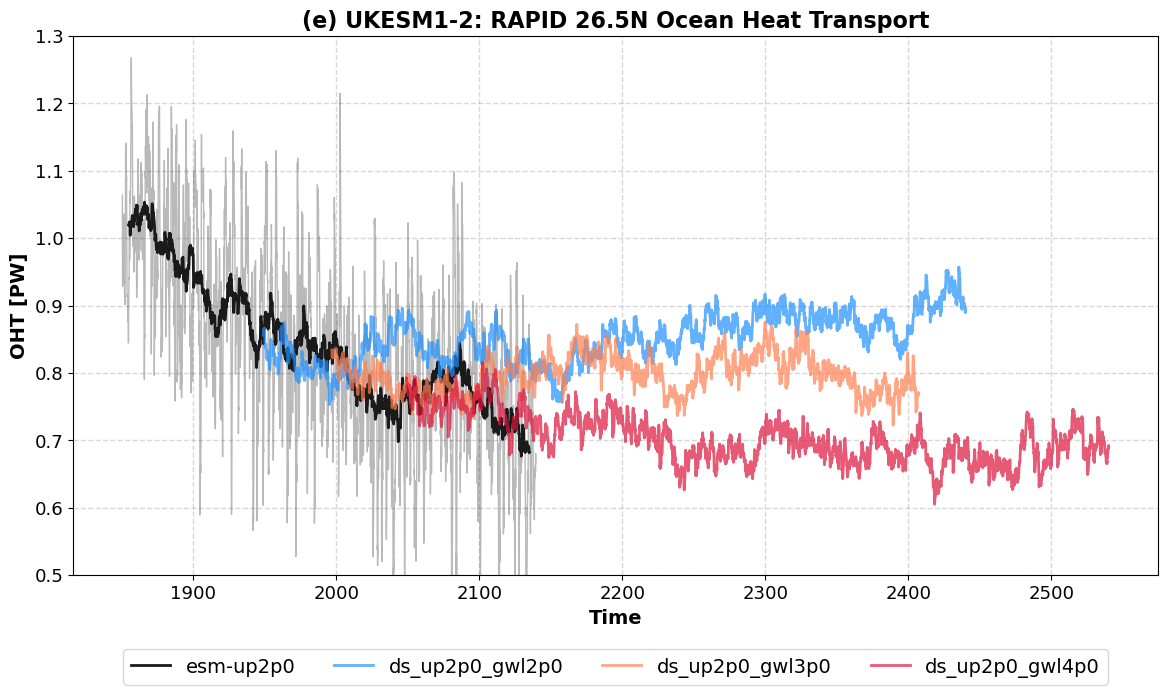

In [7]:
# -- Figure -- #
plt.figure(figsize=(14, 7))
plt.grid(True, linewidth=1, linestyle='--', color='0.5', alpha=0.3)

# Plot esm-up2p0:
ds_up2p0['q_sum_rapid'].rolling(time=12, center=True).mean().plot(lw=1, color='0.1', alpha=0.3)
ds_up2p0['q_sum_rapid'].rolling(time=120, center=True).mean().plot(lw=2, color='0.1', label='esm-up2p0')

# ds_up2p0_gwl2p0['q_sum_rapid'].plot(lw=1, color='dodgerblue', alpha=0.3)
ds_up2p0_gwl2p0['q_sum_rapid'].rolling(time=120, center=True).mean().plot(lw=2, color='dodgerblue', alpha=0.7, label='ds_up2p0_gwl2p0')

# ds_up2p0_gwl3p0['q_sum_rapid'].plot(lw=1, color='coral', alpha=0.3)
ds_up2p0_gwl3p0['q_sum_rapid'].rolling(time=120, center=True).mean().plot(lw=2, color='coral', alpha=0.7, label='ds_up2p0_gwl3p0')

# ds_up2p0_gwl4p0['q_sum_rapid'].plot(lw=1, color='crimson', alpha=0.3)
ds_up2p0_gwl4p0['q_sum_rapid'].rolling(time=120, center=True).mean().plot(lw=2, color='crimson', alpha=0.7, label='ds_up2p0_gwl4p0')

# Configure Axes:
plt.title("(e) UKESM1-2: RAPID 26.5N Ocean Heat Transport", fontdict={'size': 16, 'weight': 'bold'})
plt.xticks([cftime.Datetime360Day(yr, 1, 1) for yr in np.arange(1900, 2600, 100)], labels=np.arange(1900, 2600, 100).astype('str'), fontsize=13)
plt.xlabel("Time", fontdict={'size': 14, 'weight': 'bold'})
plt.yticks(fontsize=13)
plt.ylim([0.5, 1.3])
plt.ylabel("OHT [PW]", fontdict={'size': 14, 'weight': 'bold'})
plt.legend(ncols=4, fontsize=14, loc="upper center", bbox_to_anchor=(0.5, -0.12))

# Save Figure:
plt.savefig("/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/figures/fig_UKESM1-2_RAPID_OHT_esm-up2p0-gwl.png", bbox_inches='tight', dpi=600)


In [ ]:
# -- Figure -- #
plt.figure(figsize=(14, 7))
plt.grid(True, linewidth=1, linestyle='--', color='0.5', alpha=0.3)

# Plot esm-up2p0:
# ds_up2p0['fc'].plot(lw=1, color='0.1', alpha=0.3)
ds_up2p0['fc'].resample(time='1YE').mean().plot(lw=2, color='0.1', label='esm-up2p0 [Approx.]')

# ds_up2p0_gwl2p0['fc'].plot(lw=1, color='dodgerblue', alpha=0.3)
ds_up2p0_gwl2p0['fc'].resample(time='1YE').mean().plot(lw=2, color='dodgerblue', alpha=0.7, label='ds_up2p0_gwl2p0 [Approx.]')

# ds_up2p0_gwl3p0['fc'].plot(lw=1, color='coral', alpha=0.3)
ds_up2p0_gwl3p0['fc'].resample(time='1YE').mean().plot(lw=2, color='coral', alpha=0.7, label='ds_up2p0_gwl3p0 [Approx.]')

# ds_up2p0_gwl4p0['fc'].plot(lw=1, color='crimson', alpha=0.3)
ds_up2p0_gwl4p0['fc'].resample(time='1YE').mean().plot(lw=2, color='crimson', alpha=0.7, label='ds_up2p0_gwl3p0 [Approx.]')

# Configure Axes:
plt.title("UKESM1-2: RAPID 26.5N Florida Current Transport", fontdict={'size': 15, 'weight': 'bold'})
plt.xticks([cftime.Datetime360Day(yr, 1, 1) for yr in np.arange(1900, 2600, 100)], labels=np.arange(1900, 2600, 100).astype('str'), fontsize=13)
plt.xlabel("Time", fontdict={'size': 14, 'weight': 'bold'})
plt.yticks(fontsize=13)
plt.ylabel("Volume Transport [Sv]", fontdict={'size': 14, 'weight': 'bold'})
plt.legend(ncols=3, fontsize=11, loc="upper center", bbox_to_anchor=(0.5, -0.12))

# Save Figure:
plt.savefig("/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/figures/fig_UKESM1-2_RAPID_FC_esm-up2p0-gwl.png", bbox_inches='tight', dpi=600)


### **EC-Earth3-ESM-1:** RAPID 26.5N

In [27]:
# -- Define filepaths -- #
ec_earth_dir = "/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP4/data/SMHI"
ec_earth_names = "EC-Earth3-ESM-1_*_natl_meridional_transports_at_26N_endpoint.nc"

ec_earth_paths = glob.glob(f"{ec_earth_dir}/{ec_earth_names}")
ec_earth_paths = sorted([path for path in ec_earth_paths if 'esm-hist' not in path])
ec_earth_paths


['/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP4/data/SMHI/EC-Earth3-ESM-1_esm-piControl_r1i1p1f1_1850-01-2450-12_natl_meridional_transports_at_26N_endpoint.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP4/data/SMHI/EC-Earth3-ESM-1_esm-up2p0-gwl2p0_r1i1p1f1_1951-01-2450-12_natl_meridional_transports_at_26N_endpoint.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP4/data/SMHI/EC-Earth3-ESM-1_esm-up2p0-gwl3p0_r1i1p1f1_2001-01-2300-12_natl_meridional_transports_at_26N_endpoint.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP4/data/SMHI/EC-Earth3-ESM-1_esm-up2p0-gwl4p0_r1i1p1f1_2051-01-2550-12_natl_meridional_transports_at_26N_endpoint.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP4/data/SMHI/EC-Earth3-ESM-1_esm-up2p0-gwl5p0_r1i1p1f1_2101-01-2400-12_natl_meridional_transports_at_26N_endpoint.nc',
 '/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP4/data/SMHI/EC-Earth3-ESM-1_esm-up2p0-gwl6p0_r1i1p1f1_2151-01-2450-12_natl_meridional_tra

In [28]:
# -- Pre-Processing -- #
# Open esm-up2p0 with original time-axis:
time_coder = xr.coders.CFDatetimeCoder(time_unit="s")
print(ec_earth_paths[6])
ds_up2p0 = xr.open_dataset(ec_earth_paths[6], decode_times=time_coder)
ds_up2p0_gwl2p0 = xr.open_dataset(ec_earth_paths[1], decode_times=time_coder)
ds_up2p0_gwl3p0 = xr.open_dataset(ec_earth_paths[2], decode_times=time_coder)
ds_up2p0_gwl4p0 = xr.open_dataset(ec_earth_paths[3], decode_times=time_coder)
ds_up2p0_gwl5p0 = xr.open_dataset(ec_earth_paths[4], decode_times=time_coder)
ds_up2p0_gwl6p0 = xr.open_dataset(ec_earth_paths[5], decode_times=time_coder)


/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP4/data/SMHI/EC-Earth3-ESM-1_esm-up2p0_r1i1p1f1_1850-01-2199-12_natl_meridional_transports_at_26N_endpoint.nc


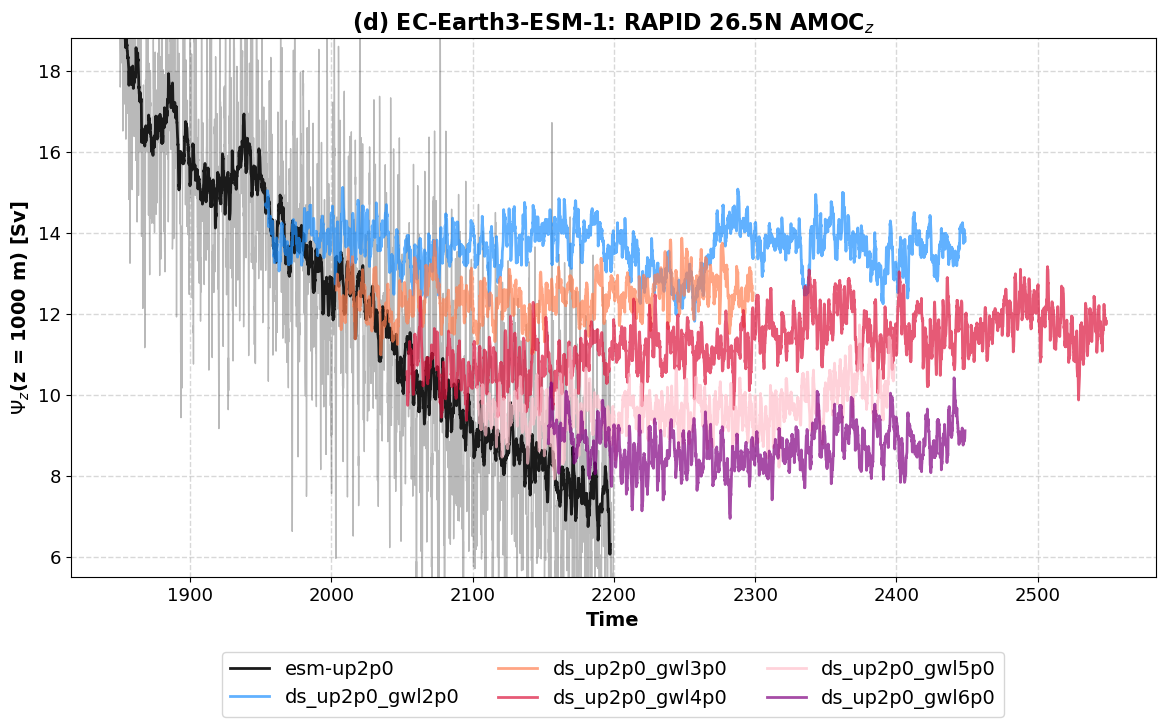

In [29]:
# -- Figure -- #
plt.figure(figsize=(14, 7))
plt.grid(True, linewidth=1, linestyle='--', color='0.5', alpha=0.3)

# Plot esm-up2p0:
ds_up2p0['moc_rapid'].rolling(time=6, center=True).mean().plot(lw=1, color='0.1', alpha=0.3)
ds_up2p0['moc_rapid'].rolling(time=60, center=True).mean().plot(lw=2, color='0.1', label='esm-up2p0')

# ds_up2p0_gwl2p0['moc_rapid'].plot(lw=1, color='dodgerblue', alpha=0.3)
ds_up2p0_gwl2p0['moc_rapid'].rolling(time=60, center=True).mean().plot(lw=2, color='dodgerblue', alpha=0.7, label='ds_up2p0_gwl2p0')

# ds_up2p0_gwl3p0['moc_rapid'].plot(lw=1, color='coral', alpha=0.3)
ds_up2p0_gwl3p0['moc_rapid'].rolling(time=60, center=True).mean().plot(lw=2, color='coral', alpha=0.7, label='ds_up2p0_gwl3p0')

# ds_up2p0_gwl4p0['moc_rapid'].plot(lw=1, color='crimson', alpha=0.3)
ds_up2p0_gwl4p0['moc_rapid'].rolling(time=60, center=True).mean().plot(lw=2, color='crimson', alpha=0.7, label='ds_up2p0_gwl4p0')

# ds_up2p0_gwl5p0['moc_rapid'].plot(lw=1, color='pink', alpha=0.3)
ds_up2p0_gwl5p0['moc_rapid'].rolling(time=60, center=True).mean().plot(lw=2, color='pink', alpha=0.7, label='ds_up2p0_gwl5p0')

# ds_up2p0_gwl6p0['moc_rapid'].plot(lw=1, color='purple', alpha=0.3)
ds_up2p0_gwl6p0['moc_rapid'].rolling(time=60, center=True).mean().plot(lw=2, color='purple', alpha=0.7, label='ds_up2p0_gwl6p0')

# Configure Axes:
plt.title("(d) EC-Earth3-ESM-1: RAPID 26.5N AMOC$_{z}$", fontdict={'size': 16, 'weight': 'bold'})
plt.xticks([cftime.Datetime360Day(yr, 1, 1) for yr in np.arange(1900, 2600, 100)], labels=np.arange(1900, 2600, 100).astype('str'), fontsize=13)
plt.xlabel("Time", fontdict={'size': 14, 'weight': 'bold'})
plt.yticks(fontsize=13)
plt.ylim([5.5, 18.8])
plt.ylabel("$\\Psi_{z}$(z = 1000 m) [Sv]", fontdict={'size': 14, 'weight': 'bold'})
plt.legend(ncols=3, fontsize=14, loc="upper center", bbox_to_anchor=(0.5, -0.12))

# Save Figure:
plt.savefig("/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/figures/fig_EC-Earth3-ESM1-1_AMOCz_esm-up2p0-gwl.png", bbox_inches='tight', dpi=600)


In [30]:
ds_up2p0_gwl4p0['moc_rapid'][-600:].mean()

import scipy.stats as ss
ss.linregress(np.arange(ds_up2p0_gwl4p0['time'].size), ds_up2p0_gwl4p0['moc_rapid'])

print(0.00022773580912900437 * 1200)

0.27328297095480525


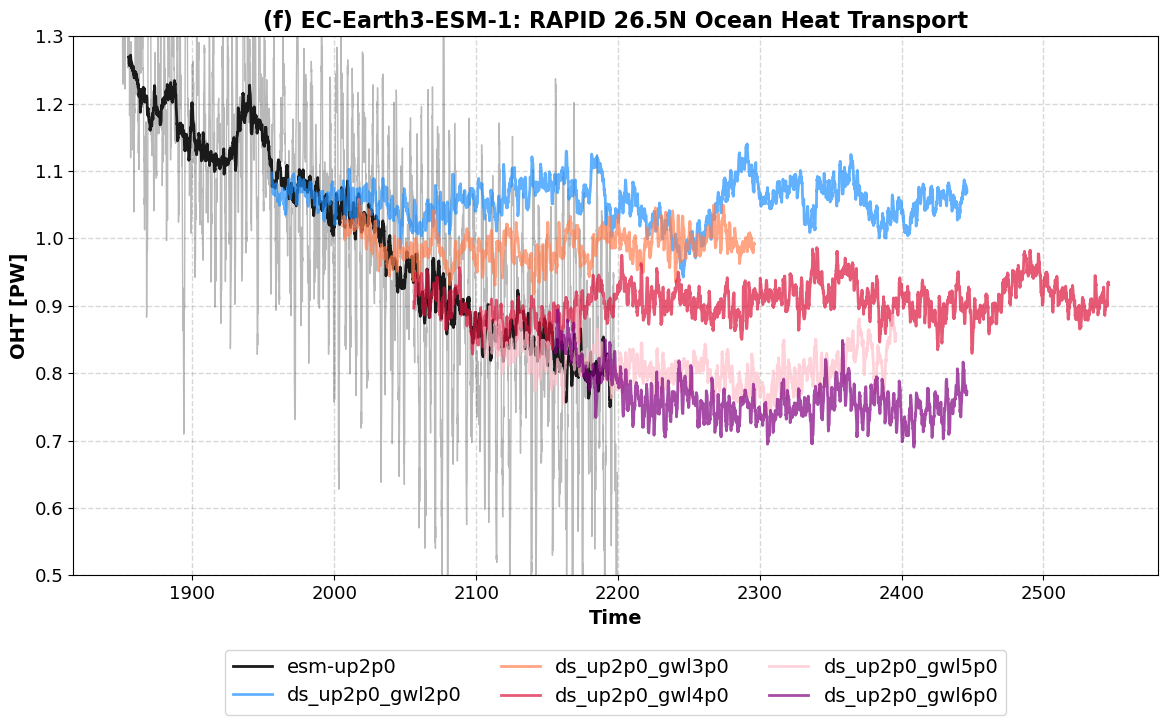

In [31]:
# -- Figure -- #
plt.figure(figsize=(14, 7))
plt.grid(True, linewidth=1, linestyle='--', color='0.5', alpha=0.3)

# Plot esm-up2p0:
ds_up2p0['q_sum_rapid'].rolling(time=12, center=True).mean().plot(lw=1, color='0.1', alpha=0.3)
ds_up2p0['q_sum_rapid'].rolling(time=120, center=True).mean().plot(lw=2, color='0.1', label='esm-up2p0')

# ds_up2p0_gwl2p0['q_sum_rapid'].plot(lw=1, color='dodgerblue', alpha=0.3)
ds_up2p0_gwl2p0['q_sum_rapid'].rolling(time=120, center=True).mean().plot(lw=2, color='dodgerblue', alpha=0.7, label='ds_up2p0_gwl2p0')

# ds_up2p0_gwl3p0['q_sum_rapid'].plot(lw=1, color='coral', alpha=0.3)
ds_up2p0_gwl3p0['q_sum_rapid'].rolling(time=120, center=True).mean().plot(lw=2, color='coral', alpha=0.7, label='ds_up2p0_gwl3p0')

# ds_up2p0_gwl4p0['q_sum_rapid'].plot(lw=1, color='crimson', alpha=0.3)
ds_up2p0_gwl4p0['q_sum_rapid'].rolling(time=120, center=True).mean().plot(lw=2, color='crimson', alpha=0.7, label='ds_up2p0_gwl4p0')

# ds_up2p0_gwl5p0['q_sum_rapid'].plot(lw=1, color='pink', alpha=0.3)
ds_up2p0_gwl5p0['q_sum_rapid'].rolling(time=120, center=True).mean().plot(lw=2, color='pink', alpha=0.7, label='ds_up2p0_gwl5p0')

# ds_up2p0_gwl6p0['q_sum_rapid'].plot(lw=1, color='purple', alpha=0.3)
ds_up2p0_gwl6p0['q_sum_rapid'].rolling(time=120, center=True).mean().plot(lw=2, color='purple', alpha=0.7, label='ds_up2p0_gwl6p0')

# Configure Axes:
plt.title("(f) EC-Earth3-ESM-1: RAPID 26.5N Ocean Heat Transport", fontdict={'size': 16, 'weight': 'bold'})
plt.xticks([cftime.Datetime360Day(yr, 1, 1) for yr in np.arange(1900, 2600, 100)], labels=np.arange(1900, 2600, 100).astype('str'), fontsize=13)
plt.xlabel("Time", fontdict={'size': 14, 'weight': 'bold'})
plt.yticks(fontsize=13)
plt.ylim([0.5, 1.3])
plt.ylabel("OHT [PW]", fontdict={'size': 14, 'weight': 'bold'})
plt.legend(ncols=3, fontsize=14, loc="upper center", bbox_to_anchor=(0.5, -0.12))

# Save Figure:
plt.savefig("/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/figures/fig_EC-Earth3-ESM1-1_OHT_esm-up2p0-gwl.png", bbox_inches='tight', dpi=600)



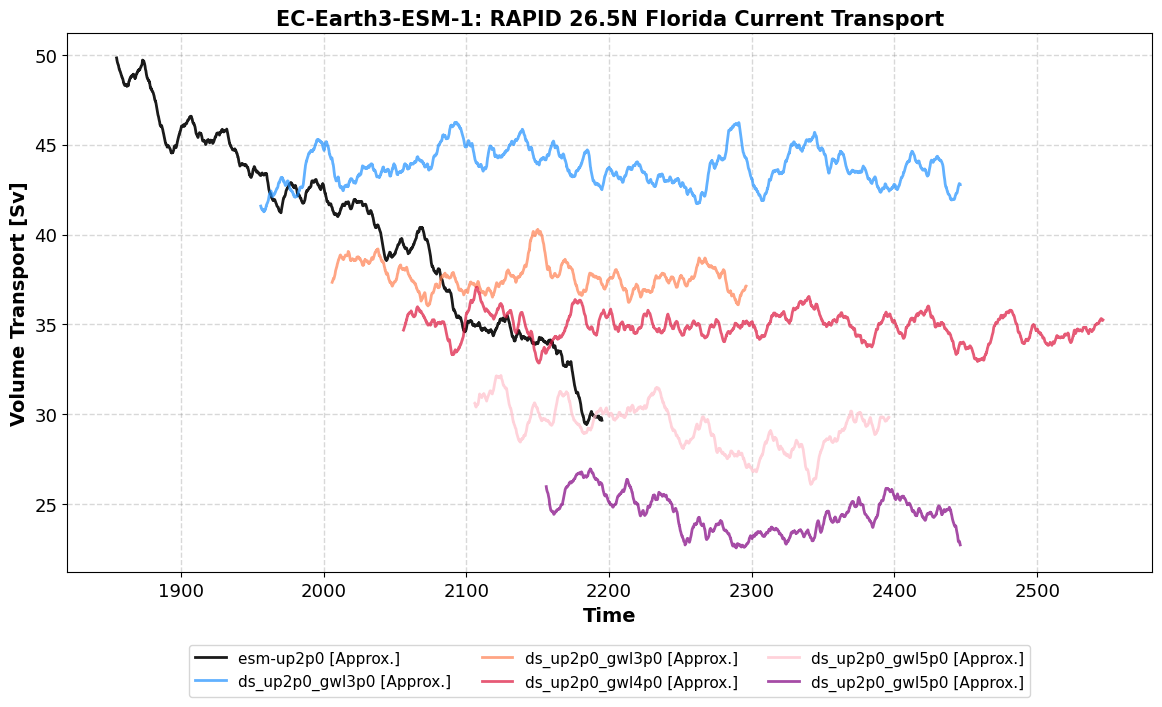

In [32]:
# -- Figure -- #
plt.figure(figsize=(14, 7))
plt.grid(True, linewidth=1, linestyle='--', color='0.5', alpha=0.3)

# Plot esm-up2p0:
# ds_up2p0['fc'].plot(lw=1, color='0.1', alpha=0.3)
ds_up2p0['fc'].rolling(time=120, center=True).mean().plot(lw=2, color='0.1', label='esm-up2p0 [Approx.]')

# ds_up2p0_gwl2p0['fc'].plot(lw=1, color='dodgerblue', alpha=0.3)
ds_up2p0_gwl2p0['fc'].rolling(time=120, center=True).mean().plot(lw=2, color='dodgerblue', alpha=0.7, label='ds_up2p0_gwl3p0 [Approx.]')

# ds_up2p0_gwl3p0['fc'].plot(lw=1, color='coral', alpha=0.3)
ds_up2p0_gwl3p0['fc'].rolling(time=120, center=True).mean().plot(lw=2, color='coral', alpha=0.7, label='ds_up2p0_gwl3p0 [Approx.]')

# ds_up2p0_gwl4p0['fc'].plot(lw=1, color='crimson', alpha=0.3)
ds_up2p0_gwl4p0['fc'].rolling(time=120, center=True).mean().plot(lw=2, color='crimson', alpha=0.7, label='ds_up2p0_gwl4p0 [Approx.]')

# ds_up2p0_gwl5p0['fc'].plot(lw=1, color='pink', alpha=0.3)
ds_up2p0_gwl5p0['fc'].rolling(time=120, center=True).mean().plot(lw=2, color='pink', alpha=0.7, label='ds_up2p0_gwl5p0 [Approx.]')

# ds_up2p0_gwl6p0['fc'].plot(lw=1, color='purple', alpha=0.3)
ds_up2p0_gwl6p0['fc'].rolling(time=120, center=True).mean().plot(lw=2, color='purple', alpha=0.7, label='ds_up2p0_gwl5p0 [Approx.]')

# Configure Axes:
plt.title("EC-Earth3-ESM-1: RAPID 26.5N Florida Current Transport", fontdict={'size': 15, 'weight': 'bold'})
plt.xticks([cftime.Datetime360Day(yr, 1, 1) for yr in np.arange(1900, 2600, 100)], labels=np.arange(1900, 2600, 100).astype('str'), fontsize=13)
plt.xlabel("Time", fontdict={'size': 14, 'weight': 'bold'})
plt.yticks(fontsize=13)
# plt.ylim([-0.15, 16.25])
plt.ylabel("Volume Transport [Sv]", fontdict={'size': 14, 'weight': 'bold'})
plt.legend(ncols=3, fontsize=11, loc="upper center", bbox_to_anchor=(0.5, -0.12))

# Save Figure:
plt.savefig("/g100_work/optim_IAC/research/noc/otooth/OptimESM/WP5/figures/fig_EC-Earth3-ESM1-1_FC_esm-up2p0-gwl.png", bbox_inches='tight', dpi=600)


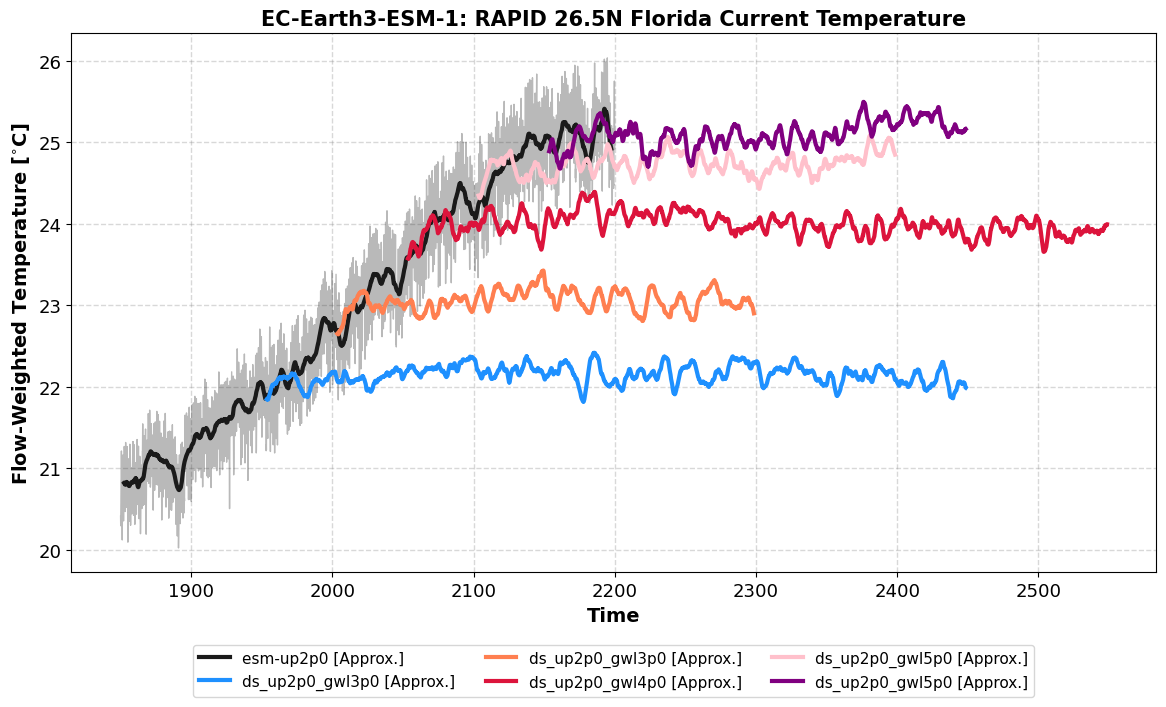

In [33]:
# -- Figure -- #
plt.figure(figsize=(14, 7))
plt.grid(True, linewidth=1, linestyle='--', color='0.5', alpha=0.3)

# Plot esm-up2p0:
ds_up2p0['t_fc_fwt'].plot(lw=1, color='0.1', alpha=0.3)
ds_up2p0['t_fc_fwt'].rolling(time=60, center=True).mean().plot(lw=3, color='0.1', label='esm-up2p0 [Approx.]')

# ds_up2p0_gwl2p0['t_fc_fwt'].plot(lw=1, color='dodgerblue', alpha=0.3)
ds_up2p0_gwl2p0['t_fc_fwt'].rolling(time=60, center=True).mean().plot(lw=3, color='dodgerblue', label='ds_up2p0_gwl3p0 [Approx.]')

# ds_up2p0_gwl3p0['t_fc_fwt'].plot(lw=1, color='coral', alpha=0.3)
ds_up2p0_gwl3p0['t_fc_fwt'].rolling(time=60, center=True).mean().plot(lw=3, color='coral', label='ds_up2p0_gwl3p0 [Approx.]')

# ds_up2p0_gwl4p0['t_fc_fwt'].plot(lw=1, color='crimson', alpha=0.3)
ds_up2p0_gwl4p0['t_fc_fwt'].rolling(time=60, center=True).mean().plot(lw=3, color='crimson', label='ds_up2p0_gwl4p0 [Approx.]')

# ds_up2p0_gwl5p0['t_fc_fwt'].plot(lw=1, color='pink', alpha=0.3)
ds_up2p0_gwl5p0['t_fc_fwt'].rolling(time=60, center=True).mean().plot(lw=3, color='pink', label='ds_up2p0_gwl5p0 [Approx.]')

# ds_up2p0_gwl6p0['t_fc_fwt'].plot(lw=1, color='purple', alpha=0.3)
ds_up2p0_gwl6p0['t_fc_fwt'].rolling(time=60, center=True).mean().plot(lw=3, color='purple', label='ds_up2p0_gwl5p0 [Approx.]')

# Configure Axes:
plt.title("EC-Earth3-ESM-1: RAPID 26.5N Florida Current Temperature", fontdict={'size': 15, 'weight': 'bold'})
plt.xticks([cftime.Datetime360Day(yr, 1, 1) for yr in np.arange(1900, 2600, 100)], labels=np.arange(1900, 2600, 100).astype('str'), fontsize=13)
plt.xlabel("Time", fontdict={'size': 14, 'weight': 'bold'})
plt.yticks(fontsize=13)
plt.ylabel("Flow-Weighted Temperature [$^{\\circ}$C]", fontdict={'size': 14, 'weight': 'bold'})
plt.legend(ncols=3, fontsize=11, loc="upper center", bbox_to_anchor=(0.5, -0.12))